[View in Colaboratory](https://colab.research.google.com/github/SakshiPriya/basic-neural-net/blob/master/3_layers_neural_net.ipynb)

In [97]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(50)

#parametrs
layers=3
batch_size=1000
input_feature=100
l1_neurno=120
l2_neurno=60
l3_neurno=1
num_epoch=800
lr_rate=0.1

#input,output,weight initialization
Z=np.random.randint(1,100,size=(input_feature,batch_size))
Y=np.random.randint(0,2,size=(l3_neurno,batch_size))
W1=np.random.random((l1_neurno,input_feature))
W2=np.random.random((l2_neurno,l1_neurno))
W3=np.random.random((l3_neurno,l2_neurno))
loss=[]

# functions
def normalize(Z):
   sh=Z.shape[0]
   mu=Z.mean(axis=1).reshape(sh,1)
   z=Z-mu
   var=np.square(z).mean(axis=1).reshape(sh,1)
   std=np.sqrt(var)
   Z=z/std
   return Z

for epoch in range(num_epoch):
  
    #forwardpass
     L1=np.dot(W1,normalize(Z))
     Z1=np.maximum(normalize(L1),0)
     L2=np.dot(W2,Z1)
     Z2=np.maximum(normalize(L2),0)
     L3=np.dot(W3,Z2)
     Ypred=1/(1+np.exp(-normalize(L3)))
     
                             
     #finding loss
     Loss=-(Y.dot(np.log(Ypred.T))+(1-Y).dot(np.log(1-Ypred.T)))
     Loss=Loss/batch_size
     loss.append(Loss)
      
     #finding gradient
     dL3=Ypred-Y
     dW3=dL3.dot(Z2.T)
     dZ2=(W3.T).dot(dL3)
     dL2=dZ2.copy()
     dL2[L2<0]=0
     dW2=dL2.dot(Z1.T)
     dZ1=(W2.T).dot(dL2)
     dL1=dZ1.copy()
     dL1[L1<0]=0
     dW1=dL1.dot(Z.T)
     
     
    
     #weight update
     W1=W1-lr_rate*dW1
     W2=W2-lr_rate*dW2
     W3=W3-lr_rate*dW3
     
                             
print(Loss)    
loss=np.array(loss)
loss=loss.reshape(loss.shape[0])



     

[[0.40017793]]


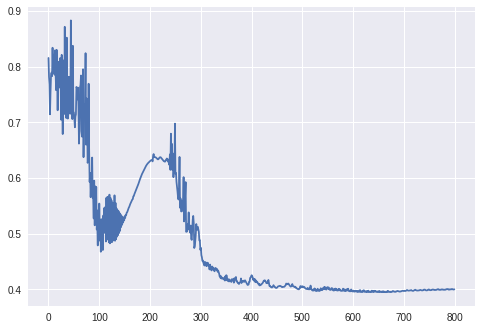

In [98]:
plt.figure()
plt.plot(loss)
plt.show()



In [99]:
def test(n):
  K=np.random.randint(1,100,size=(input_feature,n))
  Y=np.random.randint(0,2,size=(l3_neurno,n))
  L1=np.dot(W1,normalize(K))
  Z1=np.maximum(normalize(L1),0)
  L2=np.dot(W2,Z1)
  Z2=np.maximum(normalize(L2),0)
  L3=np.dot(W3,Z2)
  Ypred=1/(1+np.exp(-normalize(L3)))
  print('Y:',Y,'Ypred:',np.round(Ypred))
  
  
test(10)

('Y:', array([[1, 0, 1, 0, 0, 1, 1, 0, 1, 1]]), 'Ypred:', array([[0., 1., 1., 1., 1., 0., 0., 1., 0., 1.]]))
